# Credit Risk Evaluator

In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split


## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [83]:
# Import the data
lending_data = pd.read_csv("./Resources/lending_data.csv")

lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [84]:
# Check for rows with missing values
lending_data.isnull().sum().sum()

0

In [85]:
# Remove duplicate rows
df = lending_data.drop_duplicates()
df.shape

(5229, 8)

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

##### My Prediction

I predict that the logistic regression will perform better since there are only 7 features and all seem like they could plausibly be related to whether a loan would be denied or approved (i.e. less noise in the parameters to tune out). We are only categorizing the data into two possible groups (approved/denied) so it seems like logistic regression would be the better choice.

## Split the Data into Training and Testing Sets

In [86]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [87]:
# Train a Logistic Regression model and print the model score

from sklearn.linear_model import LogisticRegression

# Create logistic model
model_lr = LogisticRegression()

# Fit model to training data
model_lr.fit(X_train, y_train)

LogisticRegression()

In [88]:
# View score for testing data
model_lr.score(X_test, y_test)

# Print training and testing accuracy scores
print(f'Training Score: {model_lr.score(X_train, y_train)}')
print(f'Testing Score: {model_lr.score(X_test, y_test)}')

Training Score: 0.8974751338944147
Testing Score: 0.9021406727828746


In [89]:
from sklearn.preprocessing import StandardScaler

# Scale training and testing data based on training features
scaler = StandardScaler().fit(X_train)

# Apply scaling transformation to training/testing features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {model_rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9676103034940067
Testing Score: 0.8623853211009175


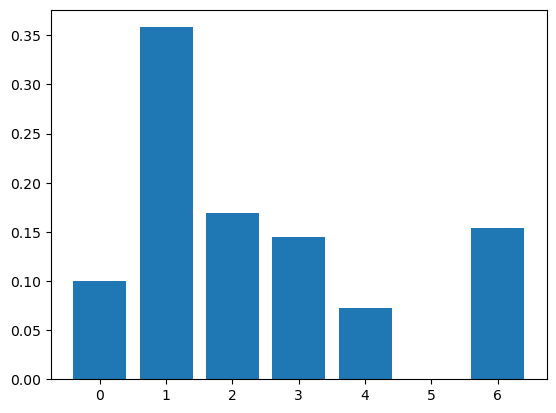

In [91]:
# Examine feature importances
features = model_rfc.feature_importances_
plt.bar(x = range(len(features)), height=features)
plt.show()

The logistic regression outperformed the random forest model. The logistic regression had a score of about 90% on the testing data while the random forest classifier had a score of about 86%. This matched my original prediction.